In [87]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [88]:
DataPath = 'Data'

In [89]:
OutputPath = 'Output'
os.makedirs(OutputPath, exist_ok=True)

In [90]:
# Loading all the images from input directory
images = [cv2.imread(os.path.join(DataPath, f)) for f in os.listdir(DataPath) if f.endswith('.jpg')]

In [91]:
# depth_to_print = 3
# curvature_threshold = 0.015
# Curve_comparison = 4

# # Find contour of the image up to 4 level hierarchy
# for i, img in enumerate(images):
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     ret, thresh = cv2.threshold(gray, 127, 255, 0)
#     contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#     img_contour = img

#     for j in range(len(contours)):
#         level = 0
#         parent = hierarchy[0][j][3]
        
#         # Traverse up the hierarchy to calculate the depth of the contour
#         while parent != -1:
#             level += 1
#             parent = hierarchy[0][parent][3]
        
#         # If contour is deeper than allowed depth, ignore it
#         if level > depth_to_print:
#             continue
        
        
#         # Approximate the contour to see if it's curved
#         epsilon = curvature_threshold * cv2.arcLength(contours[j], True)
#         approx = cv2.approxPolyDP(contours[j], epsilon, True)
        
#         # Ignore highly curved contours (if the approximation has too many points)
#         if len(approx) > Curve_comparison:  
#             continue
        
#         # Draw the contour if it passes the depth and curvature checks
#         cv2.drawContours(img_contour, [contours[j]], -1, (0, 0, 255), 3)



In [92]:
depth_to_print = 3
curvature_threshold = 0.015
Curve_comparison = 4

# Function to check if a quadrilateral is a rectangle by verifying the angles
def is_rectangle(approx):
    if len(approx) != 4:
        return False
    
    def angle(pt1, pt2, pt3):
        vec1 = pt1 - pt2
        vec2 = pt3 - pt2
        dot_product = np.dot(vec1, vec2)
        norm1 = np.linalg.norm(vec1)
        norm2 = np.linalg.norm(vec2)
        cos_angle = dot_product / (norm1 * norm2)
        angle_deg = np.degrees(np.arccos(np.clip(cos_angle, -1.0, 1.0)))
        return angle_deg
    
    angles = []
    for i in range(4):
        pt1 = approx[i][0]
        pt2 = approx[(i+1) % 4][0]
        pt3 = approx[(i+2) % 4][0]
        angles.append(angle(pt1, pt2, pt3))
    
    # Check if all angles are close to 90 degrees (within a small tolerance)
    return all(85 <= a <= 95 for a in angles)

# Find contour of the image up to 4 level hierarchy
for i, img in enumerate(images):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    img_contour = img

    for j in range(len(contours)):
        level = 0
        parent = hierarchy[0][j][3]
        
        # Traverse up the hierarchy to calculate the depth of the contour
        while parent != -1:
            level += 1
            parent = hierarchy[0][parent][3]
        
        # If contour is deeper than allowed depth, ignore it
        if level > depth_to_print:
            continue
        
        # Approximate the contour to see if it's curved
        epsilon = curvature_threshold * cv2.arcLength(contours[j], True)
        approx = cv2.approxPolyDP(contours[j], epsilon, True)
        
        # Ignore highly curved contours (if the approximation has too many points)
        if len(approx) > Curve_comparison:  
            continue
        
        # Check if the contour is a rectangle
        if is_rectangle(approx):
            # Draw the contour if it's a rectangle
            cv2.drawContours(img_contour, [approx], -1, (0, 0, 255), 8)

            copytest = img_contour.copy()

            # Draw the bounding box around the rectangle
            x, y, w, h = cv2.boundingRect(approx)
            cv2.rectangle(copytest, (x, y), (x+w, y+h), (0, 255, 0), 3)

            # croping the image to only save the rectangle
            crop_img = copytest[y:y+h, x:x+w]

            # Save the cropped image
            cv2.imwrite(os.path.join(OutputPath, f'{i}_{j}.jpg'), crop_img)


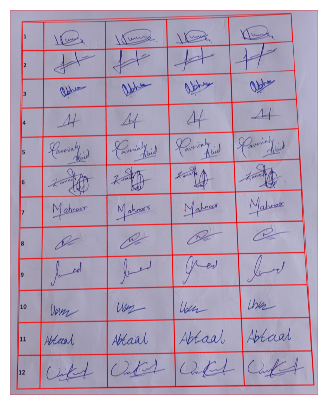

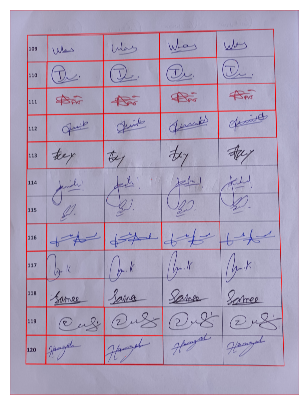

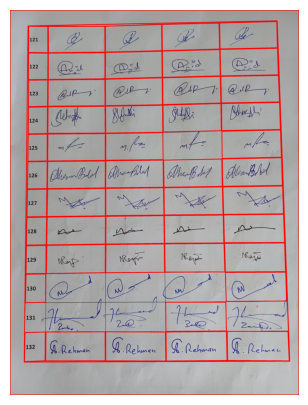

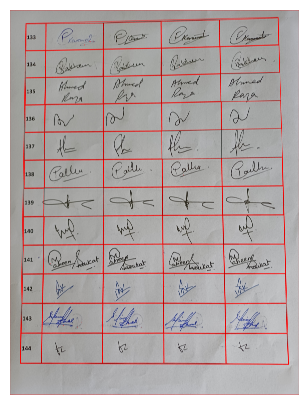

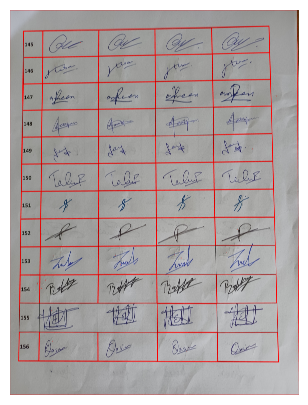

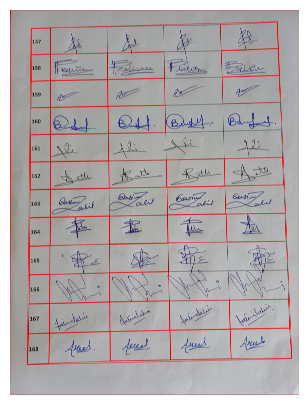

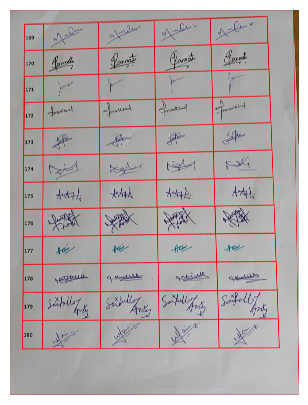

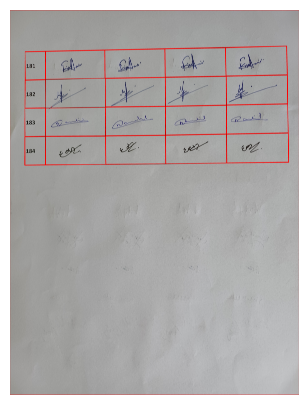

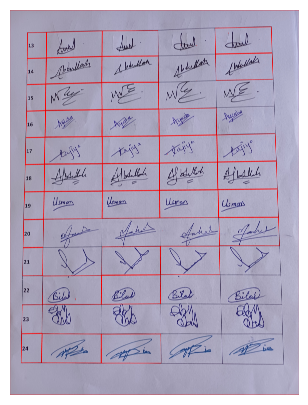

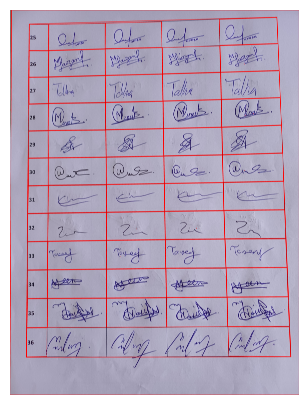

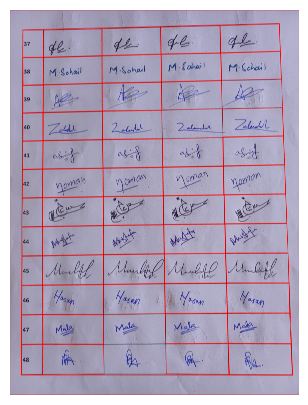

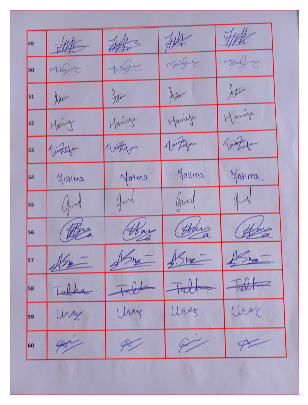

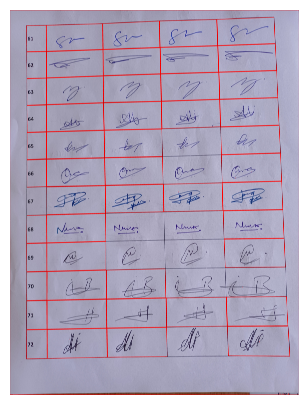

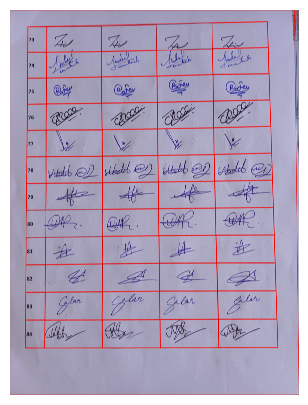

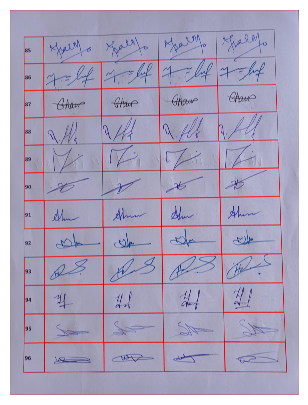

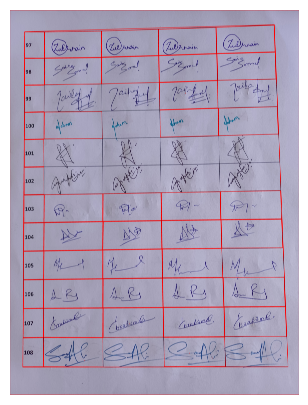

In [93]:
# Display the images
for i, img in enumerate(images):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

In [94]:
# import cv2

# # Load the image
# image_path = 'Data/1.jpg'  # Replace with your image path
# image = cv2.imread(image_path)

# # Starting cell coordinates (x, y, width, height)
# start_x = 610
# start_y = 200
# cell_width = 1150 
# cell_height = 555 

# # Initialize list to store the coordinates of all cells
# signature_coordinates = []

# # Loop through each row and column to get all cell coordinates
# for row in range(12):  # 4 rows
#     for col in range(4):  # 12 columns
#         x = start_x + col * cell_width
#         y = start_y + row * cell_height
#         signature_coordinates.append((x, y, cell_width, cell_height))

# # Draw rectangles around the cells (for visualization)
# for (x, y, w, h) in signature_coordinates:
#     cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 8)  # Green rectangle

# # Optionally, save the result with rectangles drawn
# cv2.imwrite('rectangles_image.jpg', image)  # Replace with your desired output path


In [95]:
import cv2

# Load the image
img = cv2.imread('/teamspace/studios/this_studio/Output/13_812.jpg')

# Get the dimensions of the image (height, width, channels)
height, width, _ = img.shape

# Calculate the area (in terms of pixels)
area = height * width

print(f"The area of the image is: {area} pixels")


The area of the image is: 209282 pixels


In [96]:
import os
import cv2

def delete_small_images(directory, area_threshold_lower, area_threshold_upper):
    # Traverse the directory
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            
            # Check if the file is an image (you can extend this list for other formats)
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif')):
                try:
                    # Load the image
                    img = cv2.imread(file_path)
                    
                    # Ensure the image was loaded properly
                    if img is not None:
                        # Get image dimensions
                        height, width = img.shape[:2]
                        # Calculate the area
                        area = height * width

                        # Check if the area is less than the threshold
                        if area < area_threshold_lower or area > area_threshold_upper:
                            print(f"Deleting {file_path} (area: {area} pixels)")
                            os.remove(file_path)  # Delete the file
                    else:
                        print(f"Unable to load image: {file_path}")
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

def delete_images(directory, area_threshold_lower, area_threshold_upper):
    # Traverse the directory
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            
            # Check if the file is an image (you can extend this list for other formats)
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif')):
                try:
                    # Load the image
                    img = cv2.imread(file_path)
                    
                    # Ensure the image was loaded properly
                    if img is not None:
                        # Get image dimensions
                        height, width = img.shape[:2]
                        # Calculate the area
                        area = height * width

                        # Check if the area is less than the threshold
                        if area > area_threshold_lower and area < area_threshold_upper:
                            print(f"Deleting {file_path} (area: {area} pixels)")
                            os.remove(file_path)  # Delete the file
                    else:
                        print(f"Unable to load image: {file_path}")
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

# Define the directory and area threshold (example: 5000 pixels)
directory = 'Output'
area_threshold_lower = 30
area_threshold_upper = 730000
# Call the function
delete_small_images(directory, area_threshold_lower,area_threshold_upper)


# print("Deleting numbered images")

area_threshold_lower = 200000 
area_threshold_upper = 260600 
# Call the function
delete_images(directory, area_threshold_lower,area_threshold_upper)


Deleting Output/5_80.jpg (area: 796862 pixels)
Deleting Output/6_225.jpg (area: 9 pixels)
Deleting Output/4_68.jpg (area: 9 pixels)
Deleting Output/10_258.jpg (area: 9 pixels)
Deleting Output/12_335.jpg (area: 760530 pixels)
Deleting Output/3_566.jpg (area: 9 pixels)
Deleting Output/3_205.jpg (area: 766272 pixels)
Deleting Output/6_176.jpg (area: 741370 pixels)
Deleting Output/3_10.jpg (area: 40247568 pixels)
Deleting Output/10_859.jpg (area: 9 pixels)
Deleting Output/14_629.jpg (area: 9 pixels)
Deleting Output/14_183.jpg (area: 741754 pixels)
Deleting Output/8_26.jpg (area: 751440 pixels)
Deleting Output/12_229.jpg (area: 9 pixels)
Deleting Output/14_4.jpg (area: 48000000 pixels)
Deleting Output/0_203.jpg (area: 737205 pixels)
Deleting Output/7_164.jpg (area: 750168 pixels)
Deleting Output/0_31.jpg (area: 818329 pixels)
Deleting Output/10_933.jpg (area: 9 pixels)
Deleting Output/10_6.jpg (area: 9 pixels)
Deleting Output/11_8.jpg (area: 9 pixels)
Deleting Output/11_72.jpg (area: 773568

In [97]:
import cv2
import pytesseract
import re

# Function to check if an image contains a number using OCR
def contains_number(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale for better OCR results
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Use pytesseract to extract text from the image
    text = pytesseract.image_to_string(gray)

    # Check if there is any number in the extracted text using regex
    if re.search(r'\d', text):
        print(f"Number found in image: {image_path} File Deleted")
        os.remove(image_path)
        return True
    else:
        return False

# Example usage
image_path = 'Output'

for file in os.listdir(image_path):
    if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif')):
        contains_number(os.path.join(image_path, file))


Number found in image: Output/2_192.jpg File Deleted
Number found in image: Output/3_23.jpg File Deleted
Number found in image: Output/3_42.jpg File Deleted
Number found in image: Output/2_122.jpg File Deleted
Number found in image: Output/2_428.jpg File Deleted
Number found in image: Output/11_278.jpg File Deleted
Number found in image: Output/2_103.jpg File Deleted
Number found in image: Output/2_397.jpg File Deleted
Number found in image: Output/5_75.jpg File Deleted
Number found in image: Output/2_313.jpg File Deleted
Number found in image: Output/2_252.jpg File Deleted
Number found in image: Output/2_161.jpg File Deleted
Number found in image: Output/5_38.jpg File Deleted
Number found in image: Output/2_2.jpg File Deleted


In [98]:
import os
import re
from collections import defaultdict

# Function to extract both parts of the filename (before and after the underscore)
def extract_numbers(filename):
    # Use regex to extract the numbers before and after the underscore
    match = re.match(r'(\d+)[_.](\d+)', filename)
    if match:
        return int(match.group(1)), int(match.group(2))  # Return tuple of two numbers
    return None, None

# Function to group images based on the first number and the difference in the second number
def group_images(directory, max_difference=12, max_group_size=4):
    grouped_images = defaultdict(list)
    
    # Get list of all jpg files in the directory
    images = [f for f in os.listdir(directory) if f.endswith('.jpg')]

    # Create a list of tuples (first number, second number, filename)
    image_data = [(extract_numbers(img)[0], extract_numbers(img)[1], img) for img in images]
    
    # Sort by the first number and then the second number
    image_data.sort(key=lambda x: (x[0], x[1]))
    
    current_group = []
    previous_first, previous_second = None, None
    group_id = 0

    for first_num, second_num, img in image_data:
        if (previous_first is None 
            or first_num != previous_first 
            or (second_num - previous_second <= max_difference and len(current_group) < max_group_size)):
            current_group.append(img)
        else:
            grouped_images[group_id] = current_group
            current_group = [img]
            group_id += 1

        # Check if the current group has reached the max group size
        if len(current_group) == max_group_size:
            grouped_images[group_id] = current_group
            current_group = []
            group_id += 1

        previous_first, previous_second = first_num, second_num

    # Add the last group if it's not empty
    if current_group:
        grouped_images[group_id] = current_group

    return grouped_images

# Directory where the images are stored
directory = "Output"

# Group the images and print the result
grouped_images = group_images(directory)

# Print grouped images with their paths
for group_id, images in grouped_images.items():
    print(f"Group {group_id}: {', '.join(images)}")

Group 0: 0_127.jpg, 0_132.jpg, 0_139.jpg
Group 1: 0_168.jpg, 0_180.jpg, 0_192.jpg
Group 2: 0_243.jpg
Group 3: 0_268.jpg
Group 4: 0_339.jpg
Group 5: 0_362.jpg
Group 6: 0_385.jpg
Group 7: 0_429.jpg, 0_436.jpg, 0_440.jpg, 0_444.jpg
Group 8: 0_455.jpg, 0_465.jpg
Group 9: 0_480.jpg
Group 10: 0_495.jpg, 0_505.jpg, 0_509.jpg, 0_516.jpg
Group 11: 0_526.jpg, 0_536.jpg, 0_548.jpg, 0_556.jpg
Group 12: 1_42.jpg
Group 13: 1_59.jpg
Group 14: 1_86.jpg, 1_95.jpg
Group 15: 1_121.jpg
Group 16: 1_229.jpg
Group 17: 1_243.jpg, 1_255.jpg
Group 18: 1_359.jpg
Group 19: 1_443.jpg, 1_452.jpg
Group 20: 1_465.jpg, 1_477.jpg
Group 21: 1_493.jpg
Group 22: 1_508.jpg
Group 23: 1_530.jpg
Group 24: 1_546.jpg
Group 25: 1_567.jpg, 1_572.jpg, 1_579.jpg, 1_585.jpg
Group 26: 1_589.jpg, 1_592.jpg, 2_6.jpg
Group 27: 2_20.jpg
Group 28: 2_35.jpg, 2_47.jpg
Group 29: 2_79.jpg
Group 30: 2_118.jpg, 2_127.jpg, 2_132.jpg, 2_142.jpg
Group 31: 2_152.jpg
Group 32: 2_167.jpg, 2_172.jpg, 2_182.jpg, 2_188.jpg
Group 33: 2_196.jpg
Group 34: 

In [99]:
# converting the grouped images to a list
grouped_images_list = list(grouped_images.values())

for i in grouped_images_list:
    print(i)

['0_127.jpg', '0_132.jpg', '0_139.jpg']
['0_168.jpg', '0_180.jpg', '0_192.jpg']
['0_243.jpg']
['0_268.jpg']
['0_339.jpg']
['0_362.jpg']
['0_385.jpg']
['0_429.jpg', '0_436.jpg', '0_440.jpg', '0_444.jpg']
['0_455.jpg', '0_465.jpg']
['0_480.jpg']
['0_495.jpg', '0_505.jpg', '0_509.jpg', '0_516.jpg']
['0_526.jpg', '0_536.jpg', '0_548.jpg', '0_556.jpg']
['1_42.jpg']
['1_59.jpg']
['1_86.jpg', '1_95.jpg']
['1_121.jpg']
['1_229.jpg']
['1_243.jpg', '1_255.jpg']
['1_359.jpg']
['1_443.jpg', '1_452.jpg']
['1_465.jpg', '1_477.jpg']
['1_493.jpg']
['1_508.jpg']
['1_530.jpg']
['1_546.jpg']
['1_567.jpg', '1_572.jpg', '1_579.jpg', '1_585.jpg']
['1_589.jpg', '1_592.jpg', '2_6.jpg']
['2_20.jpg']
['2_35.jpg', '2_47.jpg']
['2_79.jpg']
['2_118.jpg', '2_127.jpg', '2_132.jpg', '2_142.jpg']
['2_152.jpg']
['2_167.jpg', '2_172.jpg', '2_182.jpg', '2_188.jpg']
['2_196.jpg']
['2_212.jpg']
['2_228.jpg']
['2_241.jpg']
['2_257.jpg']
['2_270.jpg', '2_280.jpg', '2_292.jpg']
['2_317.jpg', '2_322.jpg', '2_332.jpg', '2_336.j

In [100]:
Single_Image = []
Multi_Image = []

for i in grouped_images_list:
    if len(i) == 0:
        continue
    if len(i) == 1:
        Single_Image.append(i)
    else:
        Multi_Image.append(i)

In [101]:
print("Single Image")
for i in Single_Image:
    print(i)

Single Image
['0_243.jpg']
['0_268.jpg']
['0_339.jpg']
['0_362.jpg']
['0_385.jpg']
['0_480.jpg']
['1_42.jpg']
['1_59.jpg']
['1_121.jpg']
['1_229.jpg']
['1_359.jpg']
['1_493.jpg']
['1_508.jpg']
['1_530.jpg']
['1_546.jpg']
['2_20.jpg']
['2_79.jpg']
['2_152.jpg']
['2_196.jpg']
['2_212.jpg']
['2_228.jpg']
['2_241.jpg']
['2_257.jpg']
['2_341.jpg']
['2_381.jpg']
['3_494.jpg']
['4_229.jpg']
['4_261.jpg']
['4_291.jpg']
['4_305.jpg']
['4_378.jpg']
['4_408.jpg']
['4_434.jpg']
['4_456.jpg']
['4_600.jpg']
['4_645.jpg']
['4_661.jpg']
['4_682.jpg']
['5_295.jpg']
['5_312.jpg']
['5_348.jpg']
['5_376.jpg']
['5_438.jpg']
['5_460.jpg']
['5_495.jpg']
['5_515.jpg']
['5_529.jpg']
['5_611.jpg']
['5_649.jpg']
['6_31.jpg']
['6_66.jpg']
['6_82.jpg']
['6_138.jpg']
['6_222.jpg']
['6_237.jpg']
['6_253.jpg']
['6_270.jpg']
['6_329.jpg']
['6_382.jpg']
['6_399.jpg']
['6_417.jpg']
['6_440.jpg']
['6_455.jpg']
['8_213.jpg']
['8_343.jpg']
['8_357.jpg']
['8_373.jpg']
['8_388.jpg']
['8_545.jpg']
['9_517.jpg']
['9_591.jpg']


In [102]:
Grouping_Image = {}

def LeftMost(num):
    while num >= 10:
        num //= 10
    return num

# Assuming extract_numbers is defined and returns two values
for image in Single_Image:
    L1, R1 = extract_numbers(image[0])
    left_most_r1 = LeftMost(R1)

    key = (L1, left_most_r1)  # Use a tuple as the key for grouping

    # Append the image to the corresponding group in the dictionary
    if key not in Grouping_Image:
        Grouping_Image[key] = []
    Grouping_Image[key].append(image[0])

# Convert dictionary values to a list of lists
Grouping_Image = list(Grouping_Image.values())


In [103]:
for i in Grouping_Image:
    print(i)

['0_243.jpg', '0_268.jpg']
['0_339.jpg', '0_362.jpg', '0_385.jpg']
['0_480.jpg']
['1_42.jpg', '1_493.jpg']
['1_59.jpg', '1_508.jpg', '1_530.jpg', '1_546.jpg']
['1_121.jpg']
['1_229.jpg']
['1_359.jpg']
['2_20.jpg', '2_212.jpg', '2_228.jpg', '2_241.jpg', '2_257.jpg']
['2_79.jpg']
['2_152.jpg', '2_196.jpg']
['2_341.jpg', '2_381.jpg']
['3_494.jpg']
['4_229.jpg', '4_261.jpg', '4_291.jpg']
['4_305.jpg', '4_378.jpg']
['4_408.jpg', '4_434.jpg', '4_456.jpg']
['4_600.jpg', '4_645.jpg', '4_661.jpg', '4_682.jpg']
['5_295.jpg']
['5_312.jpg', '5_348.jpg', '5_376.jpg']
['5_438.jpg', '5_460.jpg', '5_495.jpg']
['5_515.jpg', '5_529.jpg']
['5_611.jpg', '5_649.jpg']
['6_31.jpg', '6_329.jpg', '6_382.jpg', '6_399.jpg']
['6_66.jpg']
['6_82.jpg']
['6_138.jpg']
['6_222.jpg', '6_237.jpg', '6_253.jpg', '6_270.jpg']
['6_417.jpg', '6_440.jpg', '6_455.jpg']
['8_213.jpg']
['8_343.jpg', '8_357.jpg', '8_373.jpg', '8_388.jpg']
['8_545.jpg']
['9_517.jpg', '9_591.jpg']
['9_673.jpg', '9_686.jpg', '9_699.jpg']
['9_715.jpg'

In [104]:
Grouping_Image.extend(Multi_Image)

In [105]:
# convert to a dataframe
import pandas as pd

df = pd.DataFrame(Grouping_Image)

print(df)

              0           1           2           3     4
0     0_243.jpg   0_268.jpg        None        None  None
1     0_339.jpg   0_362.jpg   0_385.jpg        None  None
2     0_480.jpg        None        None        None  None
3      1_42.jpg   1_493.jpg        None        None  None
4      1_59.jpg   1_508.jpg   1_530.jpg   1_546.jpg  None
..          ...         ...         ...         ...   ...
144  13_935.jpg   14_11.jpg        None        None  None
145  14_256.jpg  14_261.jpg  14_267.jpg        None  None
146  14_610.jpg  15_288.jpg  15_295.jpg        None  None
147  15_541.jpg  15_551.jpg  15_560.jpg  15_572.jpg  None
148  15_587.jpg  15_597.jpg  15_604.jpg  15_611.jpg  None

[149 rows x 5 columns]


In [106]:
# creating a new directory to store the grouped images
Grouped_Output = 'Grouped_Output'

for i in range(len(df)):
    os.makedirs(os.path.join(Grouped_Output, f'Group_{i}'), exist_ok=True)

    for j in range(len(df.columns)):
        if pd.notna(df.iloc[i, j]):
            img = cv2.imread(os.path.join('Output', df.iloc[i, j]))
            cv2.imwrite(os.path.join(Grouped_Output, f'Group_{i}', df.iloc[i, j]), img)